In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import re

### Carica gli insiemi di video creati in 'subset_creation.ipynb'

In [2]:
%store -r good_videos avg_videos bad_videos

In [3]:
OPENFACE_DIR = 'openFace/processed/'
MEDIAPIPE_DIR = 'mediaPipe/processed/'

video = good_videos[0]
print(video)

play_lastofus_90


In [ ]:
face_mesh = pd.read_csv('mediaPipe/faceMesh/face_mesh.csv')

face_mesh.query(face_mesh.face_element == 'nose').head()

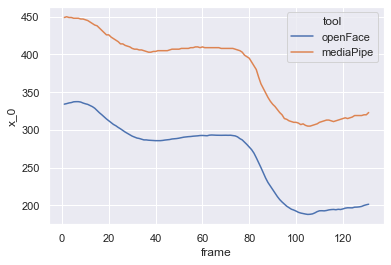

In [14]:
of_csv = OPENFACE_DIR + video + '.csv'
of_df = pd.read_csv(of_csv)
of_df['tool'] = ['openFace' for _ in range(len(of_df.index))]

mp_csv = MEDIAPIPE_DIR + video + '_mediapipe.csv'
mp_df = pd.read_csv(mp_csv)
mp_df['tool'] = ['mediaPipe' for _ in range(len(mp_df.index))]

df = pd.concat([of_df, mp_df], ignore_index=True)

sns.lineplot(x='frame', y='x_0', data=df, hue='tool')
plt.show()

In [ ]:
x_regex_pat = re.compile(r'^x_[0-9]+$')
y_regex_pat = re.compile(r'^y_[0-9]+$')

fig, axes = plt.subplots(8, 5, figsize=(15, 15), sharex=True, sharey=True)
axes = axes.flatten()

for i, videoName in enumerate(small_videoList):
    videoCsv = base_dir + videoName + '/' + videoName + '.csv'
    df = pd.read_csv(videoCsv)
    df.columns = columns

    x_locs = df.columns[df.columns.str.contains(x_regex_pat)]
    y_locs = df.columns[df.columns.str.contains(y_regex_pat)]


    palette = sns.color_palette()
    avg_face_df = pd.DataFrame({'x_locs': df[x_locs].mean(axis=1), 'y_locs': df[y_locs].mean(axis=1)})
    sns.scatterplot(x='x_locs', y='y_locs', data=avg_face_df, marker='+', ax=axes[i])
    axes[i].set(xlim=[0, 1920], ylim=[1080, 0], title=videoName)
plt.tight_layout()
plt.show()